## Importacion de Librerias y Carga de Datos

In [37]:
# importacion de librerias

import pandas as pd

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv("datasets/propiedades_scrapeadas_2025-08-21.csv")

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Superficie Balcones,Garage,Parrillero,Orientación,Cocina,Año de Construcción,Jardín,Dormitorios Servicio,Calefacción,Acepta Mascotas,Piscina,Plantas,Seguridad,Disposición,Lavadero,Dormitorios Suite,Propiedad Horizontal,Muebles,Pisos Edificio,Altura,Aptos por piso,Gastos Comúnes,Patio,Piso
0,https://www.casasymas.com.uy/propiedad/82127-v...,U$S 240.000Venta,4,3.0,390 m²,302m²,390m²,8m²,Garaje: 4,Parrillero,Este,Cocina Definida,1978.0,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/177316-...,U$S 850.000Venta,4,2.0,612 m²,328m²,612m²,NaN,Garaje: 4,NaN,NaN,Cocina Definida,1945.0,Jardín,Dormitorios de Servicio: 1,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/194470-...,U$S 267.000Venta,5,3.0,301 m²,174m²,NaN,NaN,Garaje: 1,NaN,Este,Cocina Definida,1.0,NaN,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/195384-...,U$S 215.000Venta,2,2.0,161 m²,90m²,451m²,NaN,Cochera: 4,Parrillero,Este,Cocina Integrada,1937.0,NaN,NaN,esfufa alto rendimiento,Acepta Mascotas,Piscina,1.0,"rejas, alarma, cerca electrica",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/174669-...,U$S 395.000Venta,4,2.0,345 m²,185m²,160m²,NaN,Garaje: 4,NaN,Sur,Cocina Definida,1975.0,Jardín,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1635 non-null   object 
 1   precio                 1635 non-null   object 
 2   Dormitorios            1635 non-null   object 
 3   Baños                  1580 non-null   float64
 4   Superficie             1483 non-null   object 
 5   Superficie Construida  1493 non-null   object 
 6   Superficie Terreno     1282 non-null   object 
 7   Superficie Balcones    297 non-null    object 
 8   Garage                 1092 non-null   object 
 9   Parrillero             386 non-null    object 
 10  Orientación            794 non-null    object 
 11  Cocina                 1098 non-null   object 
 12  Año de Construcción    1031 non-null   float64
 13  Jardín                 649 non-null    object 
 14  Dormitorios Servicio   275 non-null    object 
 15  Cale

# Limpieza de datos

## Eliminamos duplicados del dataset

In [41]:
# vemos los duplicados que hay en el dataset 

duplicados = df.duplicated()
print(f'Duplicados encontrados: {duplicados.sum()}')

Duplicados encontrados: 571


In [42]:
# dropeamos los duplicados del dataset por url 

df = df.drop_duplicates(subset='url')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to 1634
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1064 non-null   object 
 1   precio                 1064 non-null   object 
 2   Dormitorios            1064 non-null   object 
 3   Baños                  1032 non-null   float64
 4   Superficie             967 non-null    object 
 5   Superficie Construida  973 non-null    object 
 6   Superficie Terreno     843 non-null    object 
 7   Superficie Balcones    187 non-null    object 
 8   Garage                 718 non-null    object 
 9   Parrillero             242 non-null    object 
 10  Orientación            518 non-null    object 
 11  Cocina                 720 non-null    object 
 12  Año de Construcción    670 non-null    float64
 13  Jardín                 426 non-null    object 
 14  Dormitorios Servicio   186 non-null    object 
 15  Calefacci

## DROP DE COLUMNAS -- CRITERIO 

Vamos a dropear todas las columnas que tengan menos de 650 datos como criterio inicial. Luego podemos ver de cambiarlo, pero eso será el criterio inicial. 

In [44]:
# Calcular el número de valores no nulos por columna
non_null_counts = df.notnull().sum()

# Identificar las columnas a eliminar (non-null count < 650)
columns_to_drop = non_null_counts[non_null_counts < 650].index

# Eliminar las columnas identificadas
df = df.drop(columns=columns_to_drop)

# Mostrar las columnas restantes
print("Columnas restantes:", df.columns)

Columnas restantes: Index(['url', 'precio', 'Dormitorios', 'Baños', 'Superficie',
       'Superficie Construida', 'Superficie Terreno', 'Garage', 'Cocina',
       'Año de Construcción'],
      dtype='object')


In [45]:
df = df.drop(columns=['Superficie', 'Dormitorios Suite', 'Orientación', 'Cocina', 'Año de Construcción', 'Disposición'], errors='ignore')

In [46]:
df.head()

,url,precio,Dormitorios,Baños,Superficie Construida,Superficie Terreno,Garage
0,https://www.casasymas.com.uy/propiedad/82127-v...,U$S 240.000Venta,4,3.0,302m²,390m²,Garaje: 4
1,https://www.casasymas.com.uy/propiedad/177316-...,U$S 850.000Venta,4,2.0,328m²,612m²,Garaje: 4
2,https://www.casasymas.com.uy/propiedad/194470-...,U$S 267.000Venta,5,3.0,174m²,NaN,Garaje: 1
3,https://www.casasymas.com.uy/propiedad/195384-...,U$S 215.000Venta,2,2.0,90m²,451m²,Cochera: 4
4,https://www.casasymas.com.uy/propiedad/174669-...,U$S 395.000Venta,4,2.0,185m²,160m²,Garaje: 4


## Limpieza de campos 

Algunos campos tienen incoherencias entonces queremos dejarlos lo mas limpio posibles para nuestro analisis. 

In [47]:
# columna "precio" -> eliminamos el "U$S" y "Venta"

df['precio'] = df['precio'].str.replace("U\\$S", "", regex=True)
df['precio'] = df['precio'].str.replace("Venta", "", regex=True)
df['precio'] = df['precio'].str.replace(".", "", regex=False)
df['precio'] = df['precio'].str.strip()
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

print(df['precio'].head())

0    240000.0
1    850000.0
2    267000.0
3    215000.0
4    395000.0
Name: precio, dtype: float64


In [48]:
# # columna "Gastos Comúnes" -> sacar "$U", "UYU", "U$S"

# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("U\\$S", "", regex=True)
# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("$U", "", regex=True)
# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("UYU", "", regex=True)
# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.strip()
# df['Gastos Comúnes'] = pd.to_numeric(df['Gastos Comúnes'], errors='coerce')


In [49]:
# columna "dormitorio" -> cambiamos "Monoambiente" por 0. 

df['Dormitorios'] = df['Dormitorios'].replace("Monoambiente", 0)
df['Dormitorio'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

df = df.drop(columns=['Dormitorios'])

In [50]:
df.head()

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302m²,390m²,Garaje: 4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328m²,612m²,Garaje: 4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174m²,NaN,Garaje: 1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90m²,451m²,Cochera: 4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185m²,160m²,Garaje: 4,4


In [51]:
# # columna "Superficie" -> sacamos "mÂ²", dejando solo el numero 

# df['Superficie'] = df['Superficie'].str.replace("mÂ²", "", regex=False)
# df['Superficie'] = df['Superficie'].str.replace("m²", "", regex=False)

# # eliminar espacios 

# df['Superficie'] = df["Superficie"].str.strip()

# # convertir a numero 

# df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

In [52]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Construida'] = df['Superficie Construida'].str.replace("mÂ²", "", regex=False)
df['Superficie Construida'] = df['Superficie Construida'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Construida'] = df["Superficie Construida"].str.strip()

# convertir a numero 

df['Superficie Construida'] = pd.to_numeric(df['Superficie Construida'], errors='coerce')

In [53]:
# columna "Superficie Terreno" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("mÂ²", "", regex=False)
df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Terreno'] = df["Superficie Terreno"].str.strip()

# convertir a numero 

df['Superficie Terreno'] = pd.to_numeric(df['Superficie Terreno'], errors='coerce')

In [54]:
# # columna "Superficie Balcones" -> sacamos "mÂ²" y "m²", dejando solo el numero 

# df['Superficie Balcones'] = df['Superficie Balcones'].str.replace("mÂ²", "", regex=False)
# df['Superficie Balcones'] = df['Superficie Balcones'].str.replace("m²", "", regex=False)

# # eliminar espacios 

# df['Superficie Balcones'] = df["Superficie Balcones"].str.strip()

# # convertir a numero 

# df['Superficie Balcones'] = pd.to_numeric(df['Superficie Balcones'], errors='coerce')

In [55]:
# # columna "Dormitorios Servicio" -> dejar solo el numero en vez de "Dormitorios de servicio: 1" que quede "1" (float)

# # Reemplazar vacíos o NaN por 0
# df['Dormitorios Servicio'] = df['Dormitorios Servicio'].fillna(0)

# # Extraer solo el número
# df['Dormitorios Servicio'] = df['Dormitorios Servicio'].astype(str).str.extract('(\d+)')

# # Reemplazar cualquier valor faltante con 0 y convertir a número
# df['Dormitorios Servicio'] = df['Dormitorios Servicio'].fillna(0).astype(int)



In [56]:
# # columna "Dormitorios Suite" -> dejar solo el numero en vez de "Dormitorios en suite: 1" que quede "1" (float)

# # Reemplazar vacíos o NaN por 0
# df['Dormitorios Suite'] = df['Dormitorios Suite'].fillna(0)

# # Extraer solo el número
# df['Dormitorios Suite'] = df['Dormitorios Suite'].astype(str).str.extract('(\d+)')

# # Reemplazar cualquier valor faltante con 0 y convertir a número
# df['Dormitorios Suite'] = df['Dormitorios Suite'].fillna(0).astype(int)

In [57]:
# columna "Garage" -> dejar solo el numero en vez de "Dormitorios en suite: 1" que quede "1" (float)

# Reemplazar vacíos o NaN por 0
df['Garage'] = df['Garage'].fillna(0)

# Extraer solo el número
df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Garage'] = df['Garage'].fillna(0).astype(int)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Felipe\AppData\Local\Temp\ipykernel_44616\4138919070.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')


In [58]:
# # columna "Altura" -> pasamos de "3m" a "3"

# # Quitar la letra "m" y espacios
# df['Altura'] = df['Altura'].str.replace("m", "", regex=False)
# df['Altura'] = df['Altura'].str.strip()

# # Convertir a número
# df['Altura'] = pd.to_numeric(df['Altura'], errors='coerce')

In [59]:
# drop de filas con NaN en precio

df = df[df['precio'].notna()]

In [60]:
# chequeamos que no quede nada con NaN en precio

df[df['precio'].isna()]

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio


In [61]:
# df[df['Aptos por piso'].notna()]

In [62]:
df.head()

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4


In [63]:
# eliminar chacras del dataset 

rows_to_drop = df[df['Superficie Terreno'] > 20000].index

df = df.drop(rows_to_drop)

df.head(10)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4
5,https://www.casasymas.com.uy/propiedad/178685-...,775000.0,2.0,199.0,300.0,0,2
6,https://www.casasymas.com.uy/propiedad/119384-...,135000.0,1.0,99.0,57.0,0,2
7,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,2.0,150.0,498.0,1,3
8,https://www.casasymas.com.uy/propiedad/128325-...,175000.0,2.0,100.0,NaN,0,3
9,https://www.casasymas.com.uy/propiedad/186448-...,695000.0,4.0,249.0,321.0,2,4


In [64]:
df.head(10)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4
5,https://www.casasymas.com.uy/propiedad/178685-...,775000.0,2.0,199.0,300.0,0,2
6,https://www.casasymas.com.uy/propiedad/119384-...,135000.0,1.0,99.0,57.0,0,2
7,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,2.0,150.0,498.0,1,3
8,https://www.casasymas.com.uy/propiedad/128325-...,175000.0,2.0,100.0,NaN,0,3
9,https://www.casasymas.com.uy/propiedad/186448-...,695000.0,4.0,249.0,321.0,2,4


In [65]:
# # categorizar parrillero

# df['Parrillero'] = df['Parrillero'].apply(lambda x: 1 if 'Parrillero' in str(x) else 0)

# df.head(5)

## Transformar COCINA 

In [66]:
# # Obtener valores únicos de la columna 'Cocina'
# valores_unicos_cocina = df['Cocina'].unique()

# # Mostrar los valores únicos
# print("Valores únicos en la columna 'Cocina':", valores_unicos_cocina)

In [67]:
# # Definir una función para asignar valores
# def asignar_valor(cocina):
#     if pd.isna(cocina):
#         return 0
#     if isinstance(cocina, str):
#         cocina = cocina.strip().lower()
#         if cocina == 'cocina definida' or cocina == 'cocina integrada':
#             return 1
#     return 0

# # Aplicar la función a la columna 'Cocina'
# df['Cocina'] = df['Cocina'].apply(asignar_valor)

# # Mostrar los primeros 5 registros para verificar
# print(df.head(5))

In [68]:
valores_unicos_cocina = df['Cocina'].unique()
print("Valores únicos en la columna 'Cocina':", valores_unicos_cocina)

KeyError: 'Cocina'

In [ ]:
# df['Jardín'] = df['Jardín'].apply(lambda x: 1 if 'Jardín' in str(x) else 0)

# df.head(5)

In [ ]:
# df['Acepta Mascotas'] = df['Acepta Mascotas'].apply(lambda x: 1 if 'Acepta Mascotas' in str(x) else 0)

# df.head(5)


In [ ]:
# df['Piscina'] = df['Piscina'].apply(lambda x: 1 if 'Piscina' in str(x) else 0)

# df.head(5)

## AGREGAR COLUMNA BARRIO 

In [69]:
barrios = df['url']

print(barrios)

0       https://www.casasymas.com.uy/propiedad/82127-v...
1       https://www.casasymas.com.uy/propiedad/177316-...
2       https://www.casasymas.com.uy/propiedad/194470-...
3       https://www.casasymas.com.uy/propiedad/195384-...
4       https://www.casasymas.com.uy/propiedad/174669-...
                              ...                        
1628    https://www.casasymas.com.uy/propiedad/196265-...
1630    https://www.casasymas.com.uy/propiedad/153800-...
1632    https://www.casasymas.com.uy/propiedad/181506-...
1633    https://www.casasymas.com.uy/propiedad/190639-...
1634    https://www.casasymas.com.uy/propiedad/111235-...
Name: url, Length: 1055, dtype: object


## COMIENZA EDA

In [70]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [71]:
df.head(5)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 0 to 1634
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1055 non-null   object 
 1   precio                 1055 non-null   float64
 2   Baños                  1024 non-null   float64
 3   Superficie Construida  965 non-null    float64
 4   Superficie Terreno     835 non-null    float64
 5   Garage                 1055 non-null   int64  
 6   Dormitorio             1055 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 65.9+ KB


In [73]:
df.describe()

,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
count,1.055000e+03,1024.000000,965.000000,835.000000,1055.000000,1055.000000
mean,4.926770e+05,2.630859,211.012435,462.585629,1.164929,3.538389
std,4.733147e+05,1.640895,171.595895,861.109044,1.313809,1.987197
min,5.500000e+01,1.000000,16.000000,4.000000,0.000000,0.000000
25%,1.800000e+05,2.000000,100.000000,130.000000,0.000000,3.000000
50%,3.350000e+05,2.000000,160.000000,270.000000,1.000000,3.000000
75%,6.438500e+05,3.000000,270.000000,542.500000,2.000000,4.000000
max,4.300000e+06,24.000000,2461.000000,12907.000000,10.000000,24.000000


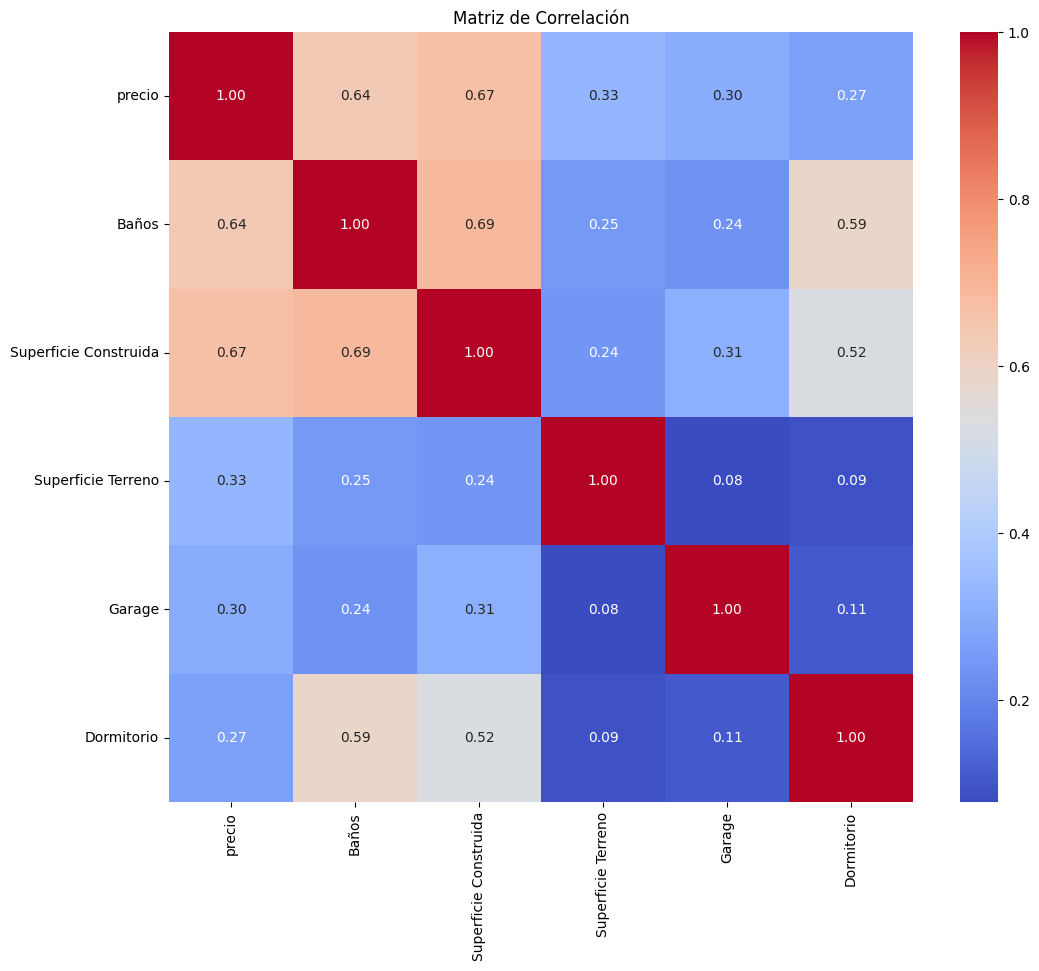

In [74]:
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando solo las columnas numéricas
correlation_matrix = numeric_df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Muestra el gráfico
plt.title('Matriz de Correlación')
plt.show()

## Boxplots

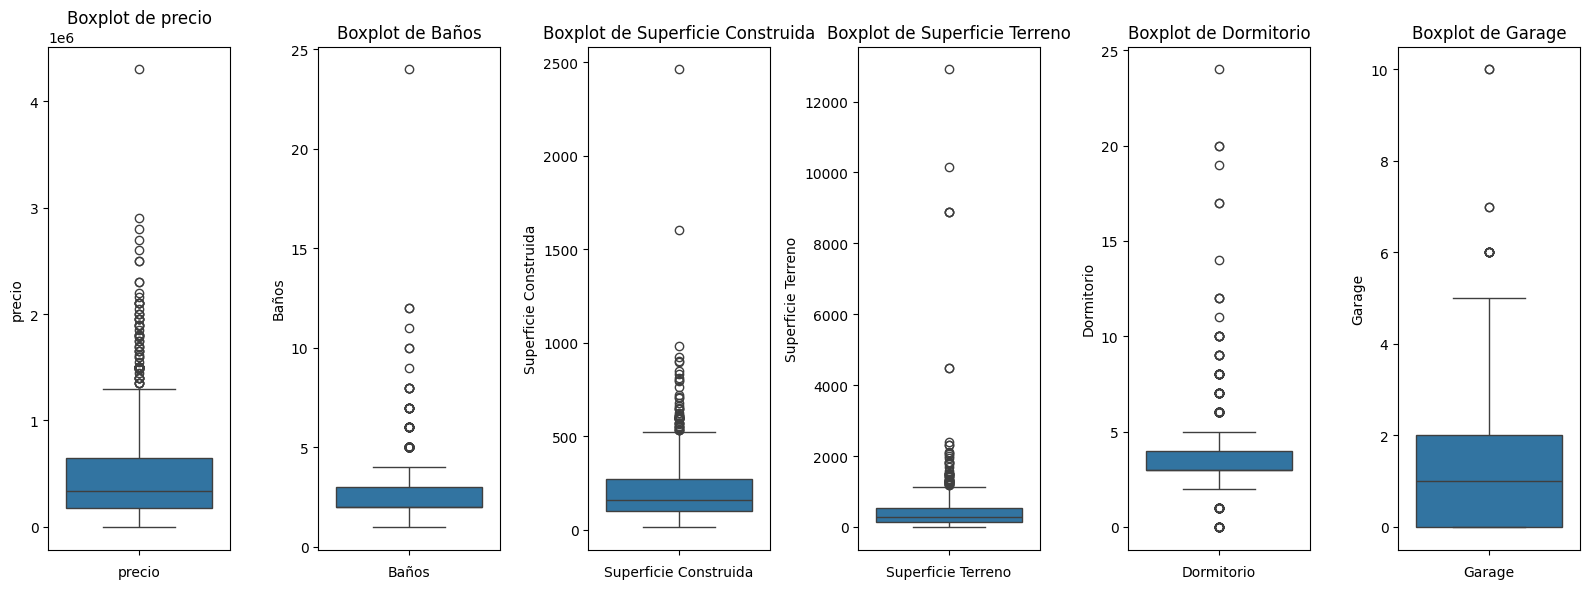

In [75]:
# Lista de las columnas que quieres graficar
columnas_interes = ['precio', 'Baños', 'Superficie Construida', 'Superficie Terreno', 'Dormitorio', 'Garage']

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, len(columnas_interes), figsize=(16, 6))

# Iterar sobre las columnas y los ejes para crear un boxplot para cada columna
for ax, col in zip(axes, columnas_interes):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()